# The purpose of this Project we will be creating one such Recommendation Engine from the ground-up, where every single user, based on there area of interest and ratings, would be recommended a list of movies that are best suited for them

## Find out the list of most popular and liked genre

### Reading dataset file and importing pandas library

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv(r"C:\Users\aishw\Downloads\movies.csv")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [5]:
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Removing year part from title column 

In [6]:
df1['title'] = df1['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

In [10]:
df1.head()

,Movie_Id,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


### Renaming movie column name 

In [9]:
df1.rename(columns={'movieId': 'Movie_Id'}, inplace=True)
df1

,Movie_Id,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben,Comedy
27274,131256,"Feuer, Eis & Dosenbier",Comedy
27275,131258,The Pirates,Adventure
27276,131260,Rentun Ruusu,(no genres listed)


### Importing second dataset 

In [12]:
data = pd.read_csv(r"C:\Users\aishw\OneDrive\Desktop\combined_data_1.txt", header=None, names=['Cust_ID', 'Rating'], usecols=[0,1])

In [14]:
data.head()

,Cust_ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


### Checking null values in Rating column 

In [15]:
pd.isnull(data.Rating)

0            True
1           False
2           False
3           False
4           False
            ...  
24058258    False
24058259    False
24058260    False
24058261    False
24058262    False
Name: Rating, Length: 24058263, dtype: bool

### Created as dataframe 

In [16]:
df_nan=pd.DataFrame(pd.isnull(data.Rating))
df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [17]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [18]:
df_nan.shape

(4499, 1)

In [19]:
df_nan=df_nan.reset_index()
df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [20]:
df_nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [26]:
df_nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

### working of full function

In [22]:
import numpy as np

np.full((2,4), '2.0')

array([['2.0', '2.0', '2.0', '2.0'],
       ['2.0', '2.0', '2.0', '2.0']], dtype='<U3')

### Created a tuple

In [23]:
x=zip(df_nan['index'][1:], df_nan['index'][:-1])
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [24]:
temp=np.full((1,547), 1)
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

### Now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on

In [25]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1

### account for last record and corresponding length
### numpy approach
last_record=np.full((1, len(data)-df_nan.iloc[-1,0]-1), movie_id)
movie_np=np.append(movie_np, last_record)
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


### The code df_nan.iloc[-1, 0] retrieves the value from the last row and the first column of the DataFrame df_nan.

In [27]:
df_nan.iloc[-1, 0]

24057834

In [28]:
np.full((1,len(data) - df_nan.iloc[-1, 0] - 1),4499)

array([[4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 

In [29]:
data=data[pd.notnull(data['Rating'])]
data['Movie_Id']=movie_np.astype(int)
data['Cust_ID']=data['Cust_ID'].astype(int)
print("Now the dataset will look like: ")
data.head()

C:\Users\aishw\AppData\Local\Temp\ipykernel_33232\587020284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Movie_Id']=movie_np.astype(int)


Now the dataset will look like: 


C:\Users\aishw\AppData\Local\Temp\ipykernel_33232\587020284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cust_ID']=data['Cust_ID'].astype(int)


,Cust_ID,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


### Now let us perform Data Cleaning

In [30]:
df = pd.merge(df1, data, on='Movie_Id', how='inner')
df

,Movie_Id,title,genres,Cust_ID,Rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1488844,3.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,822109,5.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,885013,4.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,30878,4.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,823519,3.0
...,...,...,...,...,...
23813498,4499,Dirty Rotten Scoundrels,Comedy,2591364,2.0
23813499,4499,Dirty Rotten Scoundrels,Comedy,1791000,2.0
23813500,4499,Dirty Rotten Scoundrels,Comedy,512536,5.0
23813501,4499,Dirty Rotten Scoundrels,Comedy,988963,3.0


### Replacing 'No genres listed' into NaN using pandas

In [36]:
df['genres'] = df['genres'].replace('(no genres listed)', pd.NA)
df.head()

,Movie_Id,title,genres,Cust_ID,Rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1488844,3.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,822109,5.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,885013,4.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,30878,4.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,823519,3.0


### Here dropping off rows having NaN values

In [39]:
df = df.dropna(subset=['genres']).reset_index(drop=True)
df.head()

,Movie_Id,title,genres,Cust_ID,Rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1488844,3.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,822109,5.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,885013,4.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,30878,4.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,823519,3.0


### Here checking dataset informations

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23813503 entries, 0 to 23813502
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Movie_Id  int64  
 1   title     object 
 2   genres    object 
 3   Cust_ID   int32  
 4   Rating    float64
dtypes: float64(1), int32(1), int64(1), object(2)
memory usage: 817.6+ MB


### Summing NaN values 

In [41]:
df.isnull().sum()

Movie_Id    0
title       0
genres      0
Cust_ID     0
Rating      0
dtype: int64

### Count number of ratings per movie

In [42]:
rating_counts = df['Movie_Id'].value_counts().to_dict()
rating_counts

{1905: 193941,
 2152: 162597,
 3860: 160454,
 4432: 156183,
 571: 154832,
 3938: 153996,
 4306: 151292,
 2452: 149866,
 1962: 145519,
 3962: 140979,
 1145: 140154,
 3624: 139428,
 2372: 137170,
 3427: 136850,
 2782: 135601,
 3106: 135431,
 1220: 134241,
 2862: 128446,
 4123: 121769,
 1307: 121207,
 30: 118413,
 3282: 117270,
 457: 116762,
 3151: 116362,
 1542: 114997,
 1428: 113674,
 1798: 113377,
 1865: 110159,
 1180: 108771,
 886: 108606,
 2913: 107443,
 3925: 106807,
 4356: 106020,
 2122: 105697,
 3825: 104632,
 758: 104362,
 2391: 101188,
 4472: 101118,
 607: 100248,
 313: 99812,
 191: 98720,
 1110: 98700,
 1470: 98696,
 3917: 97939,
 3756: 93241,
 4043: 90591,
 175: 90450,
 4345: 90387,
 483: 90010,
 985: 89999,
 2342: 89865,
 3333: 89714,
 2112: 87622,
 2095: 87389,
 2612: 87139,
 4266: 85050,
 2874: 83849,
 3638: 83680,
 798: 81278,
 197: 81260,
 2660: 80295,
 2580: 80136,
 1144: 79845,
 2200: 78980,
 1202: 78878,
 3368: 78213,
 357: 77314,
 299: 76944,
 3610: 75148,
 3371: 7514

### Map rating count to each movie in movies dataset

In [43]:
df['rating_count'] = df['Movie_Id'].map(rating_counts)
df

,Movie_Id,title,genres,Cust_ID,Rating,rating_count
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1488844,3.0,547
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,822109,5.0,547
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,885013,4.0,547
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,30878,4.0,547
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,823519,3.0,547
...,...,...,...,...,...,...
23813498,4499,Dirty Rotten Scoundrels,Comedy,2591364,2.0,428
23813499,4499,Dirty Rotten Scoundrels,Comedy,1791000,2.0,428
23813500,4499,Dirty Rotten Scoundrels,Comedy,512536,5.0,428
23813501,4499,Dirty Rotten Scoundrels,Comedy,988963,3.0,428


### Importing counter library

In [44]:
from collections import Counter

### Split genres and accumulate rating counts per genre

In [45]:
genre_counter = Counter()

for _, row in df[['genres', 'rating_count', 'Rating']].drop_duplicates().iterrows():
    genres = row['genres'].split('|')
    count = row['rating_count']
    for genre in genres:
        genre_counter[genre] += count

### Convert to DataFrame

In [46]:
genre_popularity = pd.DataFrame(genre_counter.items(), columns=['genre', 'num_ratings'])
genre_popularity = genre_popularity.sort_values(by='num_ratings', ascending=False)

In [47]:
genre_popularity

,genre,num_ratings
6,Drama,57006229
3,Comedy,42148870
5,Romance,19265896
9,Thriller,16629475
8,Crime,14663656
7,Action,13949415
10,Horror,13227300
0,Adventure,11334900
2,Children,7619471
12,Sci-Fi,7385260


## Find what Genre Movies have received the best and worst ratings based on User Rating.

In [48]:
from collections import defaultdict

### Aggregate ratings per genre

In [50]:
genre_rating_sum = defaultdict(float)
genre_rating_count = defaultdict(int)

for genres, rating in zip(df['genres'], df['Rating']):
    genre_list = genres.split('|')  # Split genre string
    for genre in genre_list:
        genre_rating_sum[genre] += rating
        genre_rating_count[genre] += 1

In [51]:
genre_rating_sum

defaultdict(float,
            {'Adventure': 8346656.0,
             'Animation': 2339331.0,
             'Children': 5581451.0,
             'Comedy': 30440071.0,
             'Fantasy': 3999899.0,
             'Romance': 13927702.0,
             'Drama': 41012904.0,
             'Action': 10060795.0,
             'Crime': 10382246.0,
             'Thriller': 11798233.0,
             'Horror': 9882895.0,
             'Mystery': 3084273.0,
             'Sci-Fi': 5340584.0,
             'IMAX': 95636.0,
             'Documentary': 3272346.0,
             'War': 1404579.0,
             'Musical': 3977978.0,
             'Western': 1727874.0,
             'Film-Noir': 1738719.0})

In [52]:
genre_rating_count

defaultdict(int,
            {'Adventure': 2267227,
             'Animation': 630553,
             'Children': 1524413,
             'Comedy': 8452413,
             'Fantasy': 1097724,
             'Romance': 3862361,
             'Drama': 11450961,
             'Action': 2790125,
             'Crime': 2933642,
             'Thriller': 3328392,
             'Horror': 2646909,
             'Mystery': 873625,
             'Sci-Fi': 1477581,
             'IMAX': 24994,
             'Documentary': 931294,
             'War': 398086,
             'Musical': 1065204,
             'Western': 473988,
             'Film-Noir': 485444})

### Compute average ratings per genre

In [53]:
genre_avg_rating = {
    genre: genre_rating_sum[genre] / genre_rating_count[genre]
    for genre in genre_rating_sum
}

In [54]:
genre_avg_rating

{'Adventure': 3.681438162124922,
 'Animation': 3.7099672826867844,
 'Children': 3.661377198961174,
 'Comedy': 3.601346857991913,
 'Fantasy': 3.6438111947994214,
 'Romance': 3.6060073100365293,
 'Drama': 3.5816124079018348,
 'Action': 3.6058581604766813,
 'Crime': 3.53902964301711,
 'Thriller': 3.5447245997466643,
 'Horror': 3.7337494413294903,
 'Mystery': 3.5304312491057375,
 'Sci-Fi': 3.6144103098239624,
 'IMAX': 3.8263583259982394,
 'Documentary': 3.5137625712181118,
 'War': 3.528330561737916,
 'Musical': 3.7344752742197738,
 'Western': 3.64539608597686,
 'Film-Noir': 3.5817087037845767}

### Convert to DataFrame

In [56]:
genre_stats = pd.DataFrame({
    'genre': list(genre_avg_rating.keys()),
    'avg_rating': list(genre_avg_rating.values()),
    'num_ratings': [genre_rating_count[genre] for genre in genre_avg_rating.keys()]
})
genre_stats.head()

,genre,avg_rating,num_ratings
0,Adventure,3.681438,2267227
1,Animation,3.709967,630553
2,Children,3.661377,1524413
3,Comedy,3.601347,8452413
4,Fantasy,3.643811,1097724


### Filter genres with sufficient ratings (e.g., >1000 ratings)

In [57]:
genre_stats = genre_stats[genre_stats['num_ratings'] > 1000]
genre_stats.head()

,genre,avg_rating,num_ratings
0,Adventure,3.681438,2267227
1,Animation,3.709967,630553
2,Children,3.661377,1524413
3,Comedy,3.601347,8452413
4,Fantasy,3.643811,1097724


### Sort for best and worst genres

In [58]:
best_genres = genre_stats.sort_values(by='avg_rating', ascending=False)
worst_genres = genre_stats.sort_values(by='avg_rating', ascending=True)

In [59]:
print("Top 5 Best Rated Genres:")
top5 = best_genres.head()
top5

Top 5 Best Rated Genres:


,genre,avg_rating,num_ratings
13,IMAX,3.826358,24994
16,Musical,3.734475,1065204
10,Horror,3.733749,2646909
1,Animation,3.709967,630553
0,Adventure,3.681438,2267227


In [60]:
print("\n Bottom 5 Worst Rated Genres:")
bottom5 = worst_genres.head()
bottom5


 Bottom 5 Worst Rated Genres:


,genre,avg_rating,num_ratings
14,Documentary,3.513763,931294
15,War,3.528331,398086
11,Mystery,3.530431,873625
8,Crime,3.539030,2933642
9,Thriller,3.544725,3328392


### Plotting top 5 best and bottom 5 worst rated genres

(0.0, 5.0)

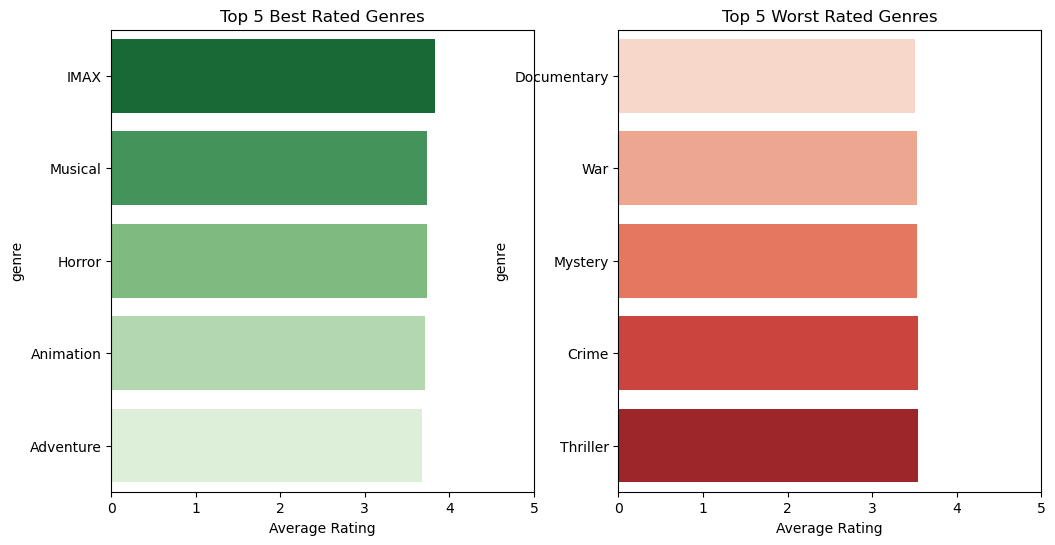

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

##plotting
plt.figure(figsize=(12,6))

# Top 5 Genres
plt.subplot(1, 2, 1)
sns.barplot(x='avg_rating', y='genre', data=top5, palette='Greens_r')
plt.title('Top 5 Best Rated Genres')
plt.xlabel('Average Rating')
plt.xlim(0, 5)

# Bottom 5 Genres
plt.subplot(1, 2, 2)
sns.barplot(x='avg_rating', y='genre', data=bottom5, palette='Reds')
plt.title('Top 5 Worst Rated Genres')
plt.xlabel('Average Rating')
plt.xlim(0, 5)

## Find what Genre Movies have received the best and worst ratings based on User Rating.

In [66]:
from surprise import SVD, Dataset, Reader
import pandas as pd
from collections import defaultdict

### Prepare data

In [67]:
reader = Reader()
data = Dataset.load_from_df(df[['Cust_ID', 'Movie_Id', 'Rating']][:100000], reader)
data

### Train-test split

In [68]:
trainset = data.build_full_trainset()
model = SVD()
model.fit(trainset)

### Get all movie IDs

In [69]:
all_movie_ids = set(df['Movie_Id'].unique())

# Target user
User_ID = 1488844

### Find movies not yet rated by this user

In [70]:
rated_movie_ids = set(df[df['Cust_ID'] == User_ID]['Movie_Id'])
unrated_movies = list(all_movie_ids - rated_movie_ids)

In [71]:
rated_movie_ids

{1,
 8,
 17,
 30,
 44,
 58,
 76,
 80,
 81,
 83,
 108,
 111,
 118,
 143,
 173,
 175,
 187,
 189,
 191,
 195,
 197,
 199,
 216,
 232,
 241,
 268,
 270,
 273,
 275,
 285,
 299,
 305,
 312,
 313,
 329,
 330,
 331,
 334,
 348,
 353,
 357,
 361,
 367,
 381,
 393,
 406,
 413,
 418,
 422,
 429,
 433,
 445,
 457,
 468,
 482,
 483,
 501,
 516,
 524,
 547,
 548,
 550,
 564,
 569,
 571,
 577,
 599,
 607,
 636,
 658,
 660,
 662,
 692,
 696,
 705,
 706,
 708,
 711,
 746,
 751,
 758,
 759,
 798,
 809,
 818,
 819,
 831,
 833,
 837,
 851,
 862,
 881,
 886,
 889,
 896,
 937,
 954,
 962,
 963,
 985,
 988,
 990,
 992,
 993,
 994,
 1011,
 1012,
 1026,
 1035,
 1043,
 1045,
 1046,
 1058,
 1066,
 1073,
 1094,
 1102,
 1110,
 1120,
 1132,
 1138,
 1140,
 1144,
 1145,
 1155,
 1163,
 1170,
 1172,
 1174,
 1180,
 1191,
 1200,
 1202,
 1216,
 1220,
 1221,
 1224,
 1226,
 1250,
 1255,
 1256,
 1260,
 1266,
 1267,
 1272,
 1289,
 1298,
 1305,
 1307,
 1314,
 1324,
 1336,
 1359,
 1367,
 1370,
 1372,
 1384,
 1401,
 1406,
 142

In [72]:
unrated_movies

[2,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 188,
 190,
 192,
 193,
 194,
 196,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 20

### Predict ratings for all unseen movies

In [73]:
predictions = []
for Movie_Id in unrated_movies:
    pred = model.predict(User_ID, Movie_Id)
    predictions.append((Movie_Id, pred.est))

### Convert predictions to DataFrame

In [74]:
pred_df = pd.DataFrame(predictions, columns=['Movie_Id', 'predicted_rating'])
pred_df.head()

,Movie_Id,predicted_rating
0,2,3.401371
1,3,3.351321
2,4,2.736600
3,5,3.447305
4,6,2.444522


### Merge with movie info (title + genres)

In [75]:
movie_info = df[['Movie_Id', 'title', 'genres']].drop_duplicates()
pred_df = pred_df.merge(movie_info, on='Movie_Id', how='left')
pred_df.head()

,Movie_Id,predicted_rating,title,genres
0,2,3.401371,Jumanji,Adventure|Children|Fantasy
1,3,3.351321,Grumpier Old Men,Comedy|Romance
2,4,2.736600,Waiting to Exhale,Comedy|Drama|Romance
3,5,3.447305,Father of the Bride Part II,Comedy
4,6,2.444522,Heat,Action|Crime|Thriller


### For each genre, find the movie with highest predicted rating

In [76]:
genre_best = defaultdict(lambda: ("", 0))


for _, row in pred_df.iterrows():
    if pd.isna(row['genres']):
        continue
    genres = row['genres'].split('|')
    for genre in genres:
        if row['predicted_rating'] > genre_best[genre][1]:
            genre_best[genre] = (row['title'], row['predicted_rating'])

### Format result

In [77]:
recommendations = pd.DataFrame([
    {"genre": genre, "recommended_movie": title, "predicted_rating": rating}
    for genre, (title, rating) in genre_best.items()
]).sort_values(by='genre')

recommendations.head()

,genre,recommended_movie,predicted_rating
6,Action,Assassins,3.710802
0,Adventure,Balto,4.287841
10,Animation,Balto,4.287841
1,Children,Balto,4.287841
3,Comedy,Four Rooms,3.597167
